# Exam: MA-INF4316 Graph Representation Learning

- Wintersemester 2022/2023
- Exam: 1
- Date 2023-02-07
- Examiner: Dr. Pascal Welke

### To be filled by the student
- Name: Aleksei
- Given Name: Zhuravlev
- Matriculation number: 50104961
- Course of Studies: MSc Computer Science

(Please enter your data here)

# Task 1

In [110]:
import igraph

g = igraph.Graph.Read_Pickle('arxiv_exam.pickle')

print('vertices', len(g.vs))
print('edges', len(g.es))

vertices 38210
edges 102316


## Task 1.1

Note: we treat the graph as undirected. This was allowed during zoom session

In [111]:
import numpy as np

# read list of edges
with open('arxiv_testedges.txt', 'r') as f:
    edges = np.loadtxt(f, dtype=int)
    
# convert to list of tuples
edge_list = [(i[0], i[1]) for i in edges]

# delete edges
g.delete_edges(edge_list)

# treating the graph as undirected
g = g.as_undirected()

print('vertices', len(g.vs))
print('edges', len(g.es))

vertices 38210
edges 90059


## Task 1.2

In [112]:
def get_shortest_path_vertices_faster(graph, source_id, l):
    neighbors = graph.neighborhood(vertices=source_id, order=l, mode='all')
    paths = graph.get_shortest_paths(source_id, neighbors, mode='all')

    target_paths = []
    vertices = []
    for i, path in enumerate(paths):
        if len(path) == l + 1:
            target_paths.append([str(vertex) for vertex in path])
            vertices.append(i)
            
    return target_paths

paths_2 = get_shortest_path_vertices_faster(g, 1337, 2)
paths_3 = get_shortest_path_vertices_faster(g, 1337, 3)

print(f'l = 2,', len(paths_2), 'paths found')
for path in paths_2:
    print(path)
print()

print(f'l = 3,', len(paths_3), 'paths found')

l = 2, 26 paths found
['1337', '2764', '14979']
['1337', '2764', '24934']
['1337', '2764', '34455']
['1337', '3005', '10077']
['1337', '3005', '28926']
['1337', '3005', '33447']
['1337', '3005', '37628']
['1337', '5911', '13688']
['1337', '14187', '12465']
['1337', '14187', '18122']
['1337', '14187', '28298']
['1337', '15929', '9504']
['1337', '15929', '14244']
['1337', '15929', '15098']
['1337', '15929', '27693']
['1337', '15929', '29162']
['1337', '15929', '29235']
['1337', '19303', '615']
['1337', '19303', '20847']
['1337', '21979', '11859']
['1337', '22809', '21451']
['1337', '27031', '18146']
['1337', '27241', '132']
['1337', '31650', '32485']
['1337', '31972', '18255']
['1337', '36321', '12516']

l = 3, 383 paths found


## Task 1.3

In [113]:
from gensim.models import Word2Vec
from tqdm import tqdm

class WalkCorpus:
    def __init__(self, graph, path_length):
        self.walks = []
        for v in tqdm(g.vs.indices):
            self.walks.extend(get_shortest_path_vertices_faster(graph, v, path_length))
        
    def __iter__(self):
        for walk in self.walks:
            yield walk

# we will run the model in task 1.5

## Task 1.4

In [117]:
# showing 5 vertices for readability
random_vertices = np.random.randint(0, len(g.vs), 5)

for i in random_vertices:
    print(f'vertex {i}')
    
    for path_length in range(1,6):
        paths = get_shortest_path_vertices_faster(g, i, path_length)
        print(f'l = {path_length},', len(paths), 'paths found')

vertex 15328
l = 1, 1 paths found
l = 2, 4 paths found
l = 3, 50 paths found
l = 4, 229 paths found
l = 5, 735 paths found
vertex 13326
l = 1, 2 paths found
l = 2, 7 paths found
l = 3, 19 paths found
l = 4, 155 paths found
l = 5, 750 paths found
vertex 30206
l = 1, 4 paths found
l = 2, 41 paths found
l = 3, 320 paths found
l = 4, 1225 paths found
l = 5, 2649 paths found
vertex 16743
l = 1, 4 paths found
l = 2, 124 paths found
l = 3, 324 paths found
l = 4, 674 paths found
l = 5, 2043 paths found
vertex 19689
l = 1, 1 paths found
l = 2, 5 paths found
l = 3, 25 paths found
l = 4, 131 paths found
l = 5, 348 paths found


Which l would you choose for your DeepPath variant, and why? Give a short answer. What benefits do random walks of length l have compared to the set of your paths of length l?

I would choose l = 3. The main idea of our approach is that two vertices that often co-occur in sequences should have similar embeddings. But if we choose the length of sequence too high, the sequences will contain vertices that are too far away and not really similar to each other, and are unlikely to share an edge.

Random walks are much faster to compute. And if we generate enough random walks, we will not lose much precision compared to DeepPaths.

## Task 1.5

In [ ]:
walks = WalkCorpus(g, 3)
model = Word2Vec(walks, vector_size=100,alpha=0.025, window=3, min_count=1, workers=12)

print(f'embedding of vertex 1337 = {model.wv["1337"]}')

100%|███████████████████████████████████████████████████████████████████████████| 38210/38210 [00:46<00:00, 819.86it/s]


embedding of vertex 1337 = [-7.4749786e-01  9.7137481e-02  4.0351853e-01 -7.1296459e-01
 -1.7050357e+00  1.8673404e-01 -2.7322981e-01  3.2814723e-01
  1.2047490e+00 -1.5765019e-01  1.4715728e+00 -3.2551706e-01
  7.0964217e-01 -5.9742302e-01  1.6348599e-01  9.1347355e-01
  6.0056591e-01 -2.0999741e-03  5.8231747e-01  8.5338634e-01
  4.8048016e-01  1.9922105e+00  1.1144536e+00 -2.7660187e-02
 -2.9380649e-01 -8.4432304e-01  1.0759381e+00  6.1890352e-01
  4.9300006e-01 -3.7845399e-02  4.8959318e-01  6.7044115e-01
 -3.4061855e-01 -1.1313773e+00  9.8181188e-01  1.7914487e+00
  1.4564564e+00 -2.4556813e+00  7.8881675e-01 -7.0825732e-01
  9.8813140e-01  4.1512910e-02  4.9071088e-01  1.2108722e+00
 -2.4242380e-01  1.9310174e+00 -5.5184078e-01  5.3643256e-01
  9.6711880e-01 -3.0143224e-02  1.1126108e+00 -1.9176389e-01
  1.5581729e-01 -2.7350935e-01  1.1455841e-01  2.3794768e+00
 -3.5850650e-01  1.2242222e+00  8.3955181e-01  5.9914637e-01
 -1.4730088e+00 -8.3376294e-01  4.5241499e-01  1.3127674e+

## Task 1.6

In [ ]:
from tqdm import tqdm
import random

def generate_random_walks(graph, walks_per_vertex, walk_length):
    walks = []
    for v in tqdm(g.vs.indices):
        if g.degree(v) == 0:
            walks.append([str(v)])
            continue
        for _ in range(walks_per_vertex):
            walk = [str(v)]
            current_vertex = v
            while len(walk) < walk_length:
                new_vertex = random.sample(g.neighbors(current_vertex), 1)[0]
                walk.append(str(new_vertex))
                current_vertex = new_vertex
            walks.append(walk)
    return walks

class RandomWalkCorpus:
    def __init__(self, graph, path_length, walks_per_vertex):
        self.walks = generate_random_walks(graph, walks_per_vertex, path_length)
        
    def __iter__(self):
        for walk in self.walks:
            yield walk

random_walks = RandomWalkCorpus(g, 3, 30)
model_random = Word2Vec(random_walks, vector_size=100,alpha=0.025, window=3, min_count=1, workers=12)

100%|██████████████████████████████████████████████████████████████████████████| 38210/38210 [00:22<00:00, 1668.38it/s]


In [ ]:
print(f'embedding of vertex 1337 = {model_random.wv["1337"]}')

embedding of vertex 1337 = [ 0.11047795  0.35439038  0.18253599  0.06900547 -0.03217153 -0.16900025
 -0.15977466  0.03937751 -0.6474914  -0.2067496   0.35604072 -0.2919285
  0.24071449  0.53868824  0.40455317 -0.3819485   0.02768965 -0.07202417
  0.17099497 -0.15609607  0.19713897 -0.44751832  0.8232379   0.25628987
  0.48736638 -0.5871785  -0.26333752 -0.37878147 -0.33490103 -0.13204338
  0.22598213 -0.67945766  0.10294651  0.03691418  0.07738917 -0.23797773
 -0.07758805 -0.31181097  0.04031445 -0.66659015  0.08014417  0.1047725
  0.14594507  0.06361733 -0.4324777   0.57786816 -0.38335857  0.7495811
 -0.6044989   0.229941   -0.06382646 -0.08489026 -0.7611282  -0.7364346
  0.3427131  -0.04800938 -0.09540834  0.14559864 -0.33218148 -0.30439016
  0.160802   -0.12473433 -0.11424671 -0.22922245 -0.6835718  -0.52541035
  0.01776435 -0.43100277 -0.43097284  0.21707694  0.02622074 -0.5939207
  0.6328688  -0.33240882 -0.06364434  0.18778415 -0.13261564 -0.15775603
 -0.6276475  -0.28020644 -0.0

## Task 1.7

DeepPath fails to compute representations for some vertices. Argue why this is the case and decide on a way to deal with it when training and evaluating your classifier

DeepPath fails for isolated vertices. To account for this, we can manually set the embeddings of those vertices to a list of zeros. They will not impact the training process, because the cosine similarity of a list of zeros with any vector is a list of zeros

In [119]:
import sklearn

# a negative test set
test_neg = set()
while len(test_neg) < 10000:
    u, v =  random.sample(range(g.vcount()), 2)

    if not g.are_connected (u,v):
        test_neg.add((u,v))

print('negative test set', len(test_neg))

# positive test set
# del_edges = random.sample(list(g.es), int(g.ecount() /5))
# test_pos = set([e.tuple for e in del_edges])
# g.delete_edges(del_edges)

test_pos = edge_list
print('positive test sets', len(test_pos))

# positive train set
train_pos = [e.tuple for e in g.es]
print('positive train sets', len(train_pos))

# negarive train set
train_neg = set()
while len(train_neg) < len(train_pos):
    u, v =  random.sample(range(g.vcount()), 2)
    if not g.are_connected (u,v):
    # make sure the edge is not contained in test set
        if (u, v) not in test_pos and (u,v) not in test_neg:
            train_neg.add((u,v))
            
train_neg = list(train_neg)
print('negative train set', len(train_neg))

# a cast to list
test_neg =  list(test_neg)
test_pos =  list(test_pos)

negative test set 10000
positive test sets 10000
positive train sets 90059
negative train set 90059


In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import scipy

def train_test_data(func, model_c):
# train set
    X_train_pos = np.array([func(e[0],e[1], model_c) for e in train_pos])
    y_train_pos = np.ones(len(train_pos))
    X_train_neg = np.array([func(e[0],e[1], model_c) for e in train_neg])
    y_train_neg = np.zeros(len(train_neg))
    
    X_train = np.append(X_train_pos, X_train_neg)
    X_train = X_train.reshape(len(X_train),1)
    y_train = np.append(y_train_pos, y_train_neg)
                              
    # test set
    X_test_pos = np.array([func(e[0],e[1], model_c) for e in test_pos])
    y_test_pos = np.ones(len(test_pos))
    X_test_neg = np.array([func(e[0],e[1], model_c) for e in test_neg])
    y_test_neg = np.zeros(len(test_neg))
    
    X_test = np.append(X_test_pos, X_test_neg)
    X_test = X_test.reshape(len(X_test),1)
    y_test = np.append(y_test_pos, y_test_neg)
    return X_train, y_train, X_test, y_test

def classify(X_train, y_train, X_test, y_test):
    log_regression = LogisticRegression()
    log_regression.fit(X_train, y_train)
    y_pred_proba = log_regression.predict_proba(X_test)[::,1]
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    return auc

def cosine(u, v, model_wv):
    return scipy.spatial.distance.cosine(model_wv[str(u)], model_wv[str(v)])

In [121]:
# random walks
X_train, y_train, X_test, y_test = train_test_data(cosine, model_random.wv)
auc = classify(X_train, y_train, X_test, y_test)
print('random walks:', auc)

random walks: 0.941618175


In [122]:
paths_model_wv = model.wv

for i in range(len(g.vs)):
    if str(i) not in paths_model_wv:
        paths_model_wv[str(i)] = np.zeros(100)

X_train, y_train, X_test, y_test = train_test_data(cosine, paths_model_wv)
auc = classify(X_train, y_train, X_test, y_test)
print('paths:', auc)

C:\Users\Алексей\AppData\Roaming\Python\Python39\site-packages\scipy\spatial\distance.py:620: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


paths: 0.8085092050000001


DeepWalk model works a lot better for our choice l = 3. This is probably because we chose a low value of l, and simply sampling random walks resulted in a better accuracy than listing all paths. For higher values of l we should see better results, because will need to generate a lot more random walks, which should reduce the accuracy of DeepWalk classifier. 

# Task 2

## Task 2.1

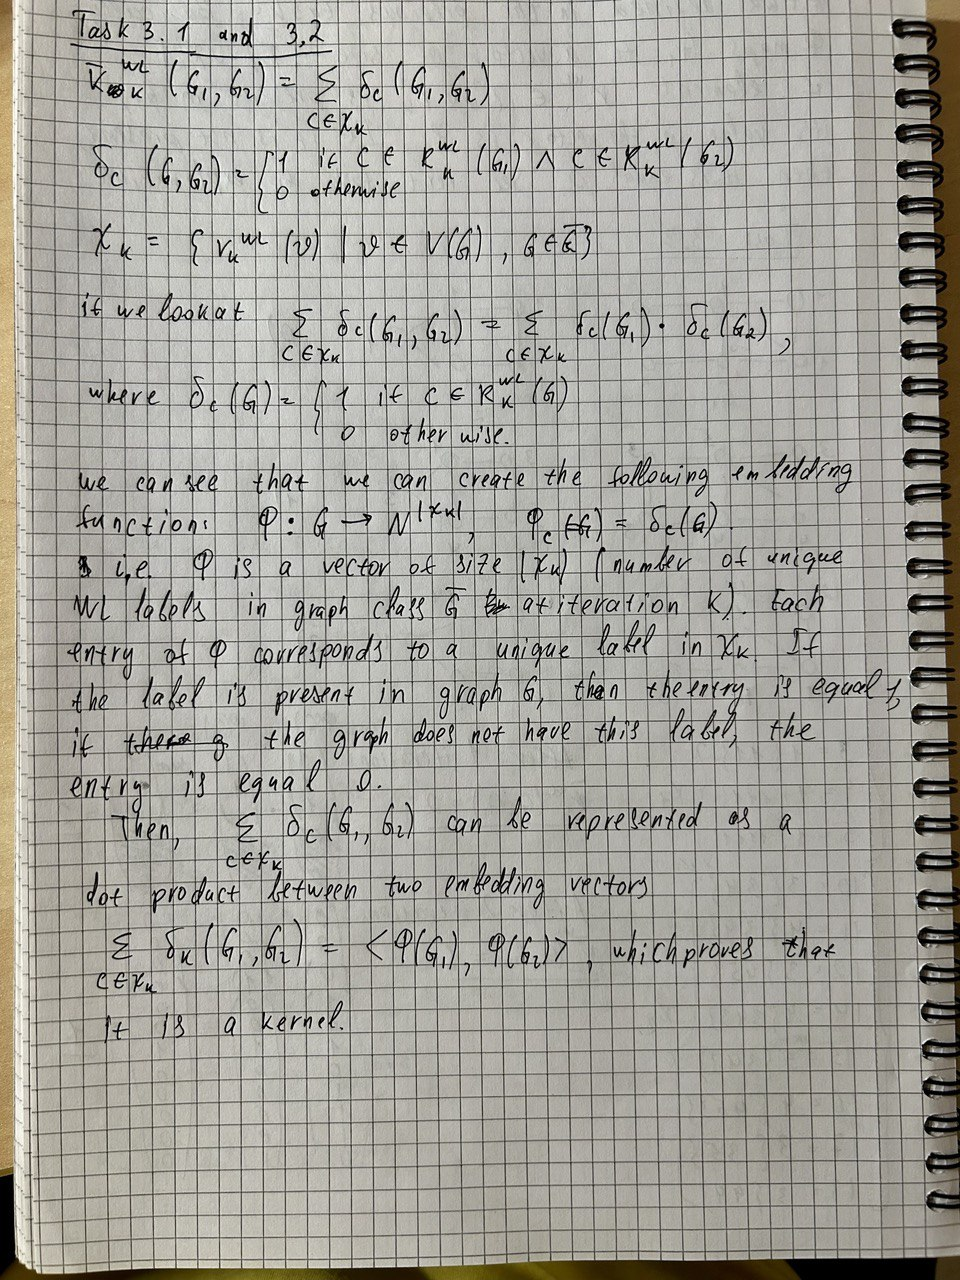

## Task 2.2

See solution for Task 2.1

## Task 2.3

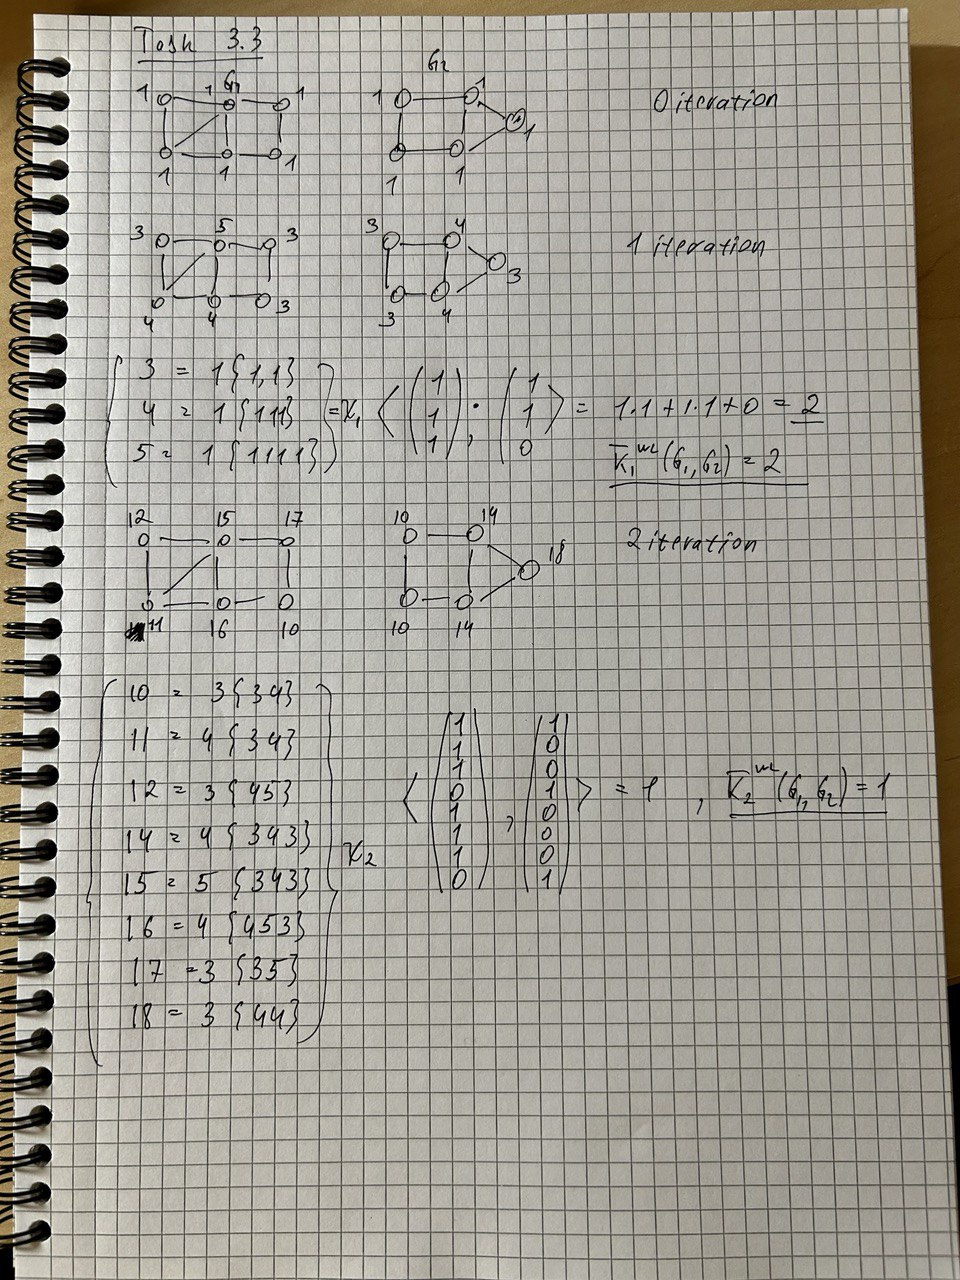

# Task 3

In [ ]:
import grakel
from grakel.datasets import fetch_dataset
DATASET = fetch_dataset("AIDS", verbose=False, as_graphs=True)
graphs = DATASET.data
labels = DATASET.target


## Task 3.1


In [ ]:
from grakel.kernels import WeisfeilerLehman, VertexHistogram
from grakel import Graph

def cumulative_kernel(k, graphs):
    gk = WeisfeilerLehman(n_iter=1, base_graph_kernel = VertexHistogram, normalize=False)
    sum_kernel = gk.fit_transform(graphs).astype(np.float32)
    
    for i in range(2, k + 1):
        gk = WeisfeilerLehman(n_iter=i, base_graph_kernel = VertexHistogram, normalize=False)
        kernel = gk.fit_transform(graphs)

        sum_kernel += kernel.astype(np.float32)
    return sum_kernel

kernel = cumulative_kernel(4, graphs)

print(
f"""
1. G45 and G84: {kernel[45, 84]}
2. G23 and G42: {kernel[23, 42]}
3. G187 and G187: {kernel[187, 187]}
"""
)


1. G45 and G84: 184.0
2. G23 and G42: 380.0
3. G187 and G187: 864.0



## Task 3.2

In [ ]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC

def k_fold_cross_validation_kernel(kernel, y_data, classifier, n_splits=10):

    fold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    acc_list = []
    for train_idx, test_idx in fold.split(y_data):
        k_train = kernel[train_idx][:, train_idx]
        k_test = kernel[test_idx][:, train_idx]
        y_train = y_data[train_idx]
        y_test = y_data[test_idx]
        classifier.fit(k_train, y_train)
        acc = classifier.score(k_test, y_test)
        acc_list.append(acc)
    print ('mean accuracy:', np.mean(acc_list))
    print('standard deviation:', np.std(acc_list))
                      
k_fold_cross_validation_kernel(kernel, labels, SVC(C = 0.1))

mean accuracy: 0.976
standard deviation: 0.006633249580710806


## Task 3.3

In [ ]:
def weighted_kernel(k, graphs):
    gk = WeisfeilerLehman(n_iter=1, base_graph_kernel = VertexHistogram, normalize=False)
    sum_kernel = gk.fit_transform(graphs).astype(np.float32)
    
    for i in range(2, k+1):
        gk = WeisfeilerLehman(n_iter=i, base_graph_kernel = VertexHistogram, normalize=False)
        kernel = gk.fit_transform(graphs)
        
        sum_kernel += kernel.astype(np.float32) / (i + 1)**2

    return sum_kernel

w_kernel = weighted_kernel(4, graphs)
print(
f"""
1. G45 and G84: {w_kernel[45, 84]}
2. G23 and G42: {w_kernel[23, 42]}
3. G187 and G187: {w_kernel[187, 187]}
"""
)
    


1. G45 and G84: 55.82611083984375
2. G23 and G42: 115.29306030273438
3. G187 and G187: 232.8538818359375



## Task 3.4

In [ ]:
k_fold_cross_validation_kernel(w_kernel, labels, SVC(C = 0.1))

mean accuracy: 0.977
standard deviation: 0.004582575694955844


## Task 3.5

In [123]:
gk = WeisfeilerLehman(n_iter=4, base_graph_kernel = VertexHistogram, normalize=True)
kernel_4 = gk.fit_transform(graphs)

In [124]:
# filtering values == 1
kernel_filtered = kernel_4 == 1
unique, counts = np.unique(np.sum(kernel_filtered, axis=1), return_counts=True)
sorted_counts = sorted(np.asarray((unique, counts)).T, key=lambda x: x[0], reverse=True)

for entry in sorted_counts[:-1]:
    print(f'{entry[1] / entry[0]} classes with {entry[0]} elements each')
# sorted_counts

1.0 classes with 8 elements each
8.0 classes with 3 elements each
77.0 classes with 2 elements each


How many different equivalence classes do we have on AIDS?

86 classes

How many graphs does the largest equivalence class on AIDS contain?

8 graphs

Will these numbers be different if we consider weighted instead unweighted in the definition of the equivalence relation? Argue why or why not.

The numbers will be the same. I used the normalized entries of Weisfeiler Lehman Kernel, which are basically the cosine similarities between the two embeddings. If we multiply the embeddings by a constant factor, the cosine similarities will not change.

## Task 3.6

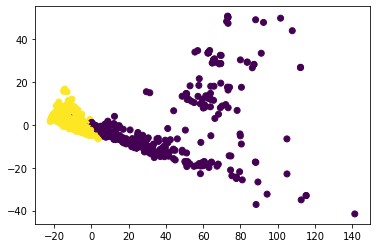

In [ ]:
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

kpca = KernelPCA(n_components=2, kernel='precomputed')
emb = kpca.fit_transform(kernel)
plt.scatter(emb[:, 0], emb[:, 1], c=DATASET.target)
plt.show()

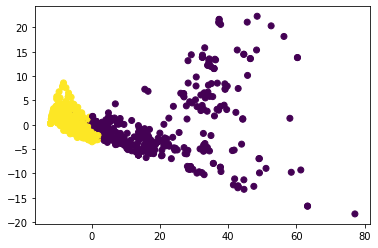

In [ ]:
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

kpca = KernelPCA(n_components=2, kernel='precomputed')
emb = kpca.fit_transform(w_kernel)
plt.scatter(emb[:, 0], emb[:, 1], c=DATASET.target)
plt.show()

Both kernels transformed the dataset into a representation where we can see two distinct clusters, which can easily be linearly separated. This is why we got such a good accuracy for the SVM classified.

# Task 4

In [ ]:
pip install pyg-lib torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-1.13.0+cu117.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.0+cu117.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.7/877.7 KB 47.7 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn.functional as F
from torch.nn import Sequential, Linear, ReLU
from torch_geometric.datasets import TUDataset
from torch_geometric.data import DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool, global_add_pool
import numpy as np

# set the train test split correctly
x = 5

dataset = TUDataset(root='/tmp/DHFR',  name='DHFR')
test_dataset = dataset[:len(dataset) // x]
train_dataset = dataset[len(dataset) // x:]
test_loader = DataLoader(test_dataset, batch_size=128)
train_loader = DataLoader(train_dataset, batch_size=128)

/usr/local/lib/python3.8/dist-packages/torch_geometric/deprecation.py:12: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
def train(epoch):
    model.train()

    # set the epochs where something happens correctly
    a = 50
    b = 75

    if epoch == a:
        for param_group in optimizer.param_groups:
            param_group['lr'] = 0.5 * param_group['lr']
    
    if epoch == b:
        for param_group in optimizer.param_groups:
            param_group['lr'] = 0.5 * param_group['lr']

    loss_all = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        output = model(data.x, data.edge_index, data.batch)
        loss = F.nll_loss(output, data.y)
        loss.backward()
        loss_all += loss.item() * data.num_graphs
        optimizer.step()
    return loss_all / len(train_dataset)


def test(loader):
    model.eval()

    correct = 0
    for data in loader:
        data = data.to(device)
        output = model(data.x, data.edge_index, data.batch)
        pred = output.max(dim=1)[1]
        correct += pred.eq(data.y).sum().item()
    return correct / len(loader.dataset)

## Task 4.1

In [ ]:
class Net(torch.nn.Module):
    def __init__ (self, n_dimensions):
        super(Net, self).__init__()
        in_dim = test_dataset.num_node_features
        self.layer1 = GCNConv(dataset.num_node_features, n_dimensions)
        self.layer2 = GCNConv(n_dimensions, n_dimensions)
        self.layer3 = GCNConv(n_dimensions, n_dimensions)
        
        self.head_1 = Linear (n_dimensions, n_dimensions // 2)
        self.head_2 = Linear (n_dimensions // 2, test_dataset.num_classes)
        
    def forward(self, x, edge_index, batch):
        x = self.layer1(x, edge_index)
        x = F.relu(x)
        
        x = self.layer2(x, edge_index)
        x = F.relu(x)
        
        x = self.layer3(x, edge_index)
        x = F.relu(x)

        x = global_mean_pool(x, batch)
        
        x = self.head_1(x)
        x = F.relu(x)

        x = self.head_2(x)

        x = F.log_softmax(x, dim=0)
        return x

In [ ]:
net_2 = Net(2)
net_8 = Net(8)
net_32 = Net(32)
net_128 = Net(128)

## Task 4.2

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
verbose = False

# set the learning rate correctly
r = 0.005

# obviously, the models in this list need to be defined
for name, model in zip(
    ['net_2', 'net_8', 'net_32', 'net_128'],
    [net_2, net_8, net_32, net_128]
    ):
  
    model = model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=r)

    for epoch in range(1, 101):
        train_loss = train(epoch)
        if verbose:
            train_acc = test(train_loader)
            test_acc = test(test_loader)
            print('Epoch: {:03d}, Train Loss: {:.7f}, '
                'Train Acc: {:.7f}, Test Acc: {:.7f}'.format(epoch, train_loss,
                                                        train_acc, test_acc))
    
    print(f'model = {name}')
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    print('Epoch: {:03d}, Train Loss: {:.7f}, '
        'Train Acc: {:.7f}, Test Acc: {:.7f}'.format(epoch, train_loss,
                                                train_acc, test_acc))


model = net_2
Epoch: 100, Train Loss: 4.8029278, Train Acc: 0.4033058, Test Acc: 0.3377483
model = net_8
Epoch: 100, Train Loss: 4.7219786, Train Acc: 0.6776860, Test Acc: 0.5099338
model = net_32
Epoch: 100, Train Loss: 4.6877131, Train Acc: 0.7074380, Test Acc: 0.5430464
model = net_128
Epoch: 100, Train Loss: 4.6570883, Train Acc: 0.7768595, Test Acc: 0.5364238


NN with d = 2 shows the worst results, NNs with d=8,32,128 show similar results with around 50% test set accuracy. In all cases, the test accuracy is much lower than train accuracy, so the model does not generalize well.

I would select d = 32, because network with a very low dimension of the vertex representations shows very bad results, and higher d does not increase accuracy, but training takes much longer

## Task 4.3

In [ ]:
from tqdm import tqdm

def get_loss(loader):
    model_net.eval()
    loss_all = 0

    for data in loader:
        data = data.to(device)
        output = model_net(data.x, data.edge_index, data.batch)
        loss = F.nll_loss(output, data.y)
        loss_all += loss.item() * data.num_graphs 
    return loss_all / len (loader.dataset)


train_loss_list = []
test_loss_list = []

for _ in tqdm(range(6)):
    model_net = Net(32)

    model_net = model_net.to(device)
    optimizer = torch.optim.Adam(model_net.parameters(), lr=0.005)
    for epoch in range(1, 101):
        _ = train(epoch)
    train_loss = get_loss(train_loader)
    train_loss_list.append(train_loss)
    test_loss = get_loss(test_loader)
    test_loss_list.append(test_loss)
    
print('train loss')
print('mean;', np.mean(train_loss_list))
print('standard deviation:', np.std(train_loss_list))
print('')
print('test loss')
print('mean:', np.mean (test_loss_list))
print('standard deviation:', np.std(test_loss_list))

100%|██████████| 6/6 [05:48<00:00, 58.15s/it]

train loss
mean; 4.802914387332506
standard deviation: 3.85354272531653e-05

test loss
mean: 4.590592709071852
standard deviation: 4.6883288151578876e-05


The standard deviation on train and test losses are similar and very low. This means that the model is not sensitive to initialization

## Task 4.4

In [ ]:
class NetNoGNN(torch.nn.Module):
    def __init__ (self, n_dimensions):
        super(NetNoGNN, self).__init__()

        self.head_1 = Linear (test_dataset.num_node_features, n_dimensions)
        self.head_2 = Linear (n_dimensions, test_dataset.num_classes)
        
    def forward(self, x, edge_index, batch):

        x = global_add_pool(x, batch)
        
        x = self.head_1(x)
        x = F.relu(x)

        x = self.head_2(x)

        x = F.log_softmax(x, dim=0)
        return x

## Task 4.5

global_add_pool returns batch-wise graph-level-outputs by adding node features across the node dimension. So, it sums up the initial vertex representations (one-hot encoded discrete labels) of DHFR nodes across each batch. Then the MLPs compute the weighted sum of all the new features, and try to select which features are important and which are not.

## Task 4.6

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
verbose = False

# set the learning rate correctly
r = 0.005

# obviously, the models in this list need to be defined
for d in [2, 8, 32, 128]:

    model = NetNoGNN(d)
  
    model = model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=r)

    for epoch in range(1, 101):
        train_loss = train(epoch)
        if verbose:
            train_acc = test(train_loader)
            test_acc = test(test_loader)
            print('Epoch: {:03d}, Train Loss: {:.7f}, '
                'Train Acc: {:.7f}, Test Acc: {:.7f}'.format(epoch, train_loss,
                                                        train_acc, test_acc))
    
    print(f'model = {d} dimensions')
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    print('Epoch: {:03d}, Train Loss: {:.7f}, '
        'Train Acc: {:.7f}, Test Acc: {:.7f}'.format(epoch, train_loss,
                                                train_acc, test_acc))

model = 2 dimensions
Epoch: 100, Train Loss: 4.7989994, Train Acc: 0.4148760, Test Acc: 0.3509934
model = 8 dimensions
Epoch: 100, Train Loss: 4.7691217, Train Acc: 0.6264463, Test Acc: 0.5695364
model = 32 dimensions
Epoch: 100, Train Loss: 4.7436491, Train Acc: 0.6314050, Test Acc: 0.4768212
model = 128 dimensions
Epoch: 100, Train Loss: 4.7015209, Train Acc: 0.6892562, Test Acc: 0.4966887


NN with d = 2 shows the worst results, NNs with d=8,32,128 show similar results with around 50% test set accuracy. The model with 8 dimensions has the highest test accuracy of 56%. In all cases, the test accuracy is much lower than train accuracy, so the model does not generalize well.

These results are quite similar to the CGN networks we considered before. This implies that for our task CGNs + global_mean_pool work almost the same as global_add_pool + MLPs. The CGN+MLP networks had more layers than pure MLP networks, which resulted in a slightly higher accuracy